## Demonstration of Pattern Detection by a Matched Filter

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the [matched filter](https://en.wikipedia.org/wiki/Matched_filter) technique to detect known patterns in a noisy sequence. We use two [Maximum Length Sequences](https://de.wikipedia.org/wiki/Maximum_Length_Sequence) (MLS) which are embedded in a signal at different positions in the presence of superimposed white normal distributed noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import max_len_seq

First the noise free signal $x[k]$ is generated and plotted for illustration

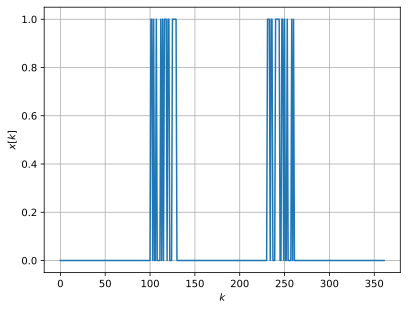

In [2]:
h1 = max_len_seq(5, state=[0,1,1,0,1])[0]
h2 = max_len_seq(5, state=[1,1,1,0,1])[0]

x = np.concatenate((np.zeros(100), h1, np.zeros(100), h2, np.zeros(100)))

plt.plot(x)
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.grid()

Now the noise is added to the signal $x_n[k] = x[k] + n[k]$. Due to the high amplitude of the noise, the original patterns are hardly observable in the noisy signal.

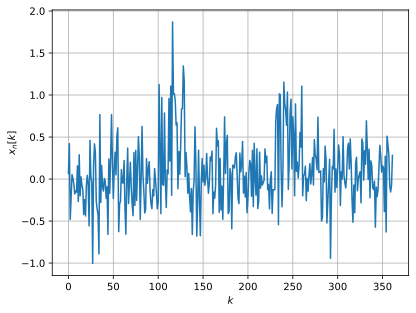

In [3]:
xn = x + 0.3 * np.random.normal(size=len(x))

plt.plot(xn)
plt.xlabel(r'$k$')
plt.ylabel(r'$x_n[k]$')
plt.grid()

We aim at detecting the original patterns by applying a matched filter for each of them. The peaks in the output signals $y_{\{1,2\}}[k] = x_n[k] \ast h_{\{1,2\}}[-k]$ indicate the positions of the original patterns in the noisy signal $x_n[k]$. Hereby $h_{\{1,2\}}[-k]$ denote the time-reversed sequences of the patterns.

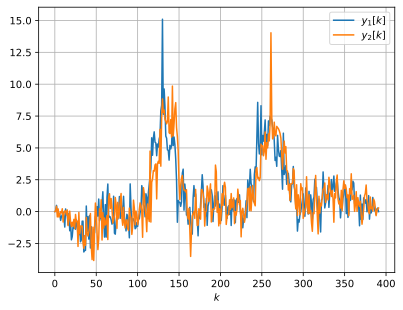

In [4]:
y1 = np.convolve(xn, h1[::-1], mode='full')
y2 = np.convolve(xn, h2[::-1], mode='full')

plt.plot(y1, label=r'$y_1[k]$')
plt.plot(y2, label=r'$y_2[k]$')
plt.xlabel(r'$k$')
plt.grid()
plt.legend()